In [1]:
import numpy as np, matplotlib.pyplot as plt
import os
import Bio
from Bio import SeqIO

In [12]:
os.chdir("/home/jlparkinson1/Documents/gp_proteins/_benchmarking_xGPR/benchmark_evals/fluorescence_eval/raw_data/")
with open("wt.fasta", "r") as f1:
    true_wt = [s for s in SeqIO.parse(f1, "fasta")][0]

In [28]:
os.chdir("/home/jlparkinson1/Documents/gp_proteins/_benchmarking_xGPR/benchmark_evals/fluorescence_eval/raw_data/2b3q_a/a3m")

In [30]:
with open("bfd_uniclust_hits.a3m", "r") as f1:
    seqs = [s for s in SeqIO.parse(f1, "fasta")]
    
template = str(seqs[0].seq)
template = template[:64] + "--" + template[64:]
print(template)

MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTL--XVQCFSRYPDHMKRHDFFKSAMPEGYVQERTISFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYITADKQKNGIKANFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYKGSHHHHHH


In [69]:
clean_seqs = []
for seq in seqs:
    counter, n_added = 0, 0
    clean_seq = []
    for letter in str(seq.seq):
        if letter.upper() == letter:
            clean_seq.append(letter)
            counter += 1
        elif counter == 64 and n_added < 2:
            clean_seq.append(letter.upper())
            n_added += 1
    if n_added == 1:
        clean_seq.insert(65, "-")
    if len(clean_seq) == 244 and n_added == 0:
        clean_seq.insert(64, "-")
        clean_seq.insert(64, "-")
    clean_seqs.append("".join(clean_seq))

In [70]:
np.unique([len(s) for s in clean_seqs])

array([246])

In [73]:
str(true_wt.seq) == clean_seqs[0][:-8]

False

In [74]:
clean_seqs[0][:-8]

'MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTL--XVQCFSRYPDHMKRHDFFKSAMPEGYVQERTISFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYITADKQKNGIKANFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK'

In [76]:
str(true_wt.seq)

'MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTLVTTFSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLVNRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLADHYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK'

In [15]:
with open("fluor_fasta.fasta", "r") as f1:
    ms_seq = [f for f in SeqIO.parse(f1, "fasta")]
    
ms_seq = str(ms_seq[0].seq)

msa = np.zeros((len(ms_seq), 21))

In [37]:
aas = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I',
       'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', '-']

def construct_block(block_seqs, msa_data, start_position):
    query_seq = block_seqs[0]
    retrieved_seqs = block_seqs[1]
    valid_positions = [i for i in range(len(query_seq)) if query_seq[i] != "-"]
    for seq in retrieved_seqs:
        if len(seq) != len(query_seq):
            import pdb
            pdb.set_trace()
            raise ValueError("Sequence of wrong length!")
        for i, valid_position in enumerate(valid_positions):
            try:
                msa_data[start_position+i, aas.index(seq[valid_position])] += 1
            except:
                import pdb
                pdb.set_trace()
    return start_position + len(valid_positions)

In [39]:
block = ["",[]]
start_position = 0

for line in lines[6:]:
    if len(line) < 3:
        continue
    if line.startswith("#=") or line.startswith("//"):
        continue
    seq = line.strip().split()[-1]
    if line.startswith("sp|P42212|GFP_AEQVI"):
        if len(block[1]) > 0:
            start_position = construct_block(block, msa, start_position)
            print("Block complete")
        block = [seq,[]]
    else:
        clean_seq = seq.replace("X", "-")
        clean_seq = clean_seq.replace("B", "-")
        clean_seq = clean_seq.replace("Z", "-")
        block[1].append(clean_seq)

if len(block[1]) > 0:
    start_position = construct_block(block, msa, start_position)

Block complete
Block complete
Block complete
Block complete
Block complete
Block complete
Block complete


In [47]:
np.save("raw_msa.npy", msa)

In [49]:
prob_msa = msa.copy()
prob_msa = (prob_msa + 1) / (prob_msa.sum(axis=1) + 21)[:,None]

In [53]:
np.save("prob_msa.npy", prob_msa)

In [18]:
raw_checking = np.load("raw_msa.npy")
checking = np.load("prob_msa.npy")

<BarContainer object of 238 artists>

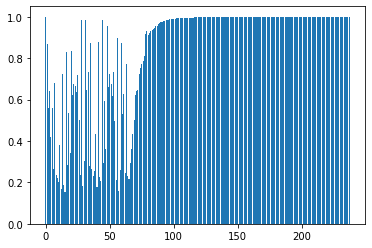

In [17]:
wut = checking.max(axis=1)
plt.bar(np.arange(wut.shape[0]), wut)

In [19]:
raw_checking

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 9.646056e+06],
       [1.357800e+04, 3.414000e+03, 3.041400e+04, ..., 1.820000e+02,
        1.040000e+02, 8.375365e+06],
       [5.617100e+04, 6.859100e+04, 7.870900e+04, ..., 1.003950e+05,
        1.189060e+05, 5.399705e+06],
       ...,
       [0.000000e+00, 2.000000e+00, 0.000000e+00, ..., 2.000000e+00,
        0.000000e+00, 2.904126e+06],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 1.760000e+02,
        0.000000e+00, 2.904134e+06],
       [0.000000e+00, 2.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 2.904140e+06]])